In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
from pprint import pprint

In [2]:
json_path="./scaling-01.json"
with open(json_path) as f:
    data = json.load(f)

In [3]:
nodes = []
draw = []
mpi = []
balancer = []

for d in data["datapoints"]:
    comp_time = np.asarray(list(map(lambda x: x["computationTime"],
                   d["data"]["workers"])))
    draw_time = np.asarray(list(map(lambda x: x["drawTime"],
                   d["data"]["workers"])))
    mpi_time = np.asarray(list(map(lambda x: x["mpiTime"],
                   d["data"]["workers"])))
    balancer_time = d["data"]["balancer"]["time"]
    
    nodes.append(np.max(comp_time))
    draw.append(np.max(draw_time))
    mpi.append(np.average(comp_time))
    balancer.append(balancer_time)


# time in s
nodes = np.asarray(nodes) / 1e6
draw = np.asarray(draw) / 1e6
mpi = np.asarray(mpi) / 1e6
balancer = np.asarray(balancer) / 1e6
        
print(nodes, draw, mpi, balancer)

[66.312526 48.151427 37.586129 37.583665 26.410007 26.40957  25.840827
 25.840299 16.696755 16.694134 16.698699 16.695195 16.694    16.698089
 16.698429 16.696477  9.877913  9.877147  9.875232  9.874932  9.878577
  9.875992  9.877118  9.876845  9.877103  9.877221  9.876545  9.876751
  9.875417  9.876989  9.877323  9.877031  6.823905  6.823833  6.824207
  6.82408   6.82403 ] [0.       0.060716 0.027663 0.016976 0.025774 0.016479 0.015181 0.016975
 0.017176 0.015082 0.019382 0.026757 0.011781 0.015477 0.01458  0.014474
 0.015975 0.012384 0.012681 0.020479 0.009488 0.011385 0.01408  0.011283
 0.010187 0.012181 0.013977 0.021068 0.009887 0.013483 0.020884 0.007984
 0.007091 0.006385 0.006984 0.007491 0.006991] [66.312526   33.1337525  22.35953733 16.79845225 13.3666122  11.13947533
  9.48011629  8.28840113  7.37286656  6.6423153   6.04358109  5.52280008
  5.09793462  4.73427193  4.41868293  4.14953213  3.90418847  3.68739022
  3.49171437  3.31696885  3.16044848  3.015407    2.88453252  2.7

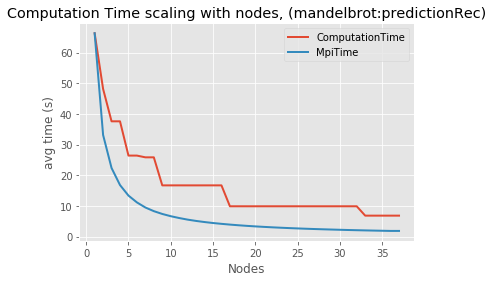

In [4]:
# Data for plotting
x = np.arange(len(nodes)) + 1
names = ["ComputationTime", "DrawTime", "MpiTime", "BalancerTime"]

plt.style.use('ggplot')
fig, ax = plt.subplots()
p0 = ax.plot(x, nodes, label=names[0], lw=2)
# p1 = ax.plot(x, draw, label=names[1], lw=2)
p2 = ax.plot(x, mpi, label=names[2], lw=2)
# p3 = ax.plot(x, balancer, label=names[3], lw=2)
ax.legend()

ax.set(xlabel='Nodes', ylabel='avg time (s)',
       title='Computation Time scaling with nodes, (mandelbrot:predictionRec)')
ax.grid(True)


# fig.savefig("impl_test.svg", format="svg")
plt.show()

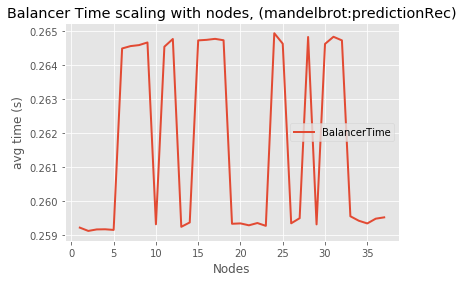

In [5]:
# Data for plotting
x = np.arange(len(nodes)) + 1
names = ["ComputationTime", "DrawTime", "MpiTime", "BalancerTime"]

plt.style.use('ggplot')
fig, ax = plt.subplots()
# p1 = ax.plot(x, draw, label=names[1], lw=2)
p3 = ax.plot(x, balancer, label=names[3], lw=2)
ax.legend()

ax.set(xlabel='Nodes', ylabel='avg time (s)',
       title='Balancer Time scaling with nodes, (mandelbrot:predictionRec)')
ax.grid(True)


# fig.savefig("impl_test.svg", format="svg")
plt.show()

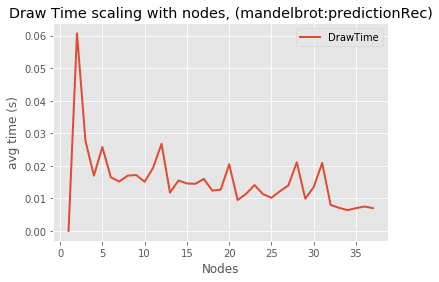

In [6]:
# Data for plotting
x = np.arange(len(nodes)) + 1
names = ["ComputationTime", "DrawTime", "MpiTime", "BalancerTime"]

plt.style.use('ggplot')
fig, ax = plt.subplots()
p1 = ax.plot(x, draw, label=names[1], lw=2)
ax.legend()

ax.set(xlabel='Nodes', ylabel='avg time (s)',
       title='Draw Time scaling with nodes, (mandelbrot:predictionRec)')
ax.grid(True)


# fig.savefig("impl_test.svg", format="svg")
plt.show()